In [6]:
from intent_recognition import *

# ZIPF'S LAW

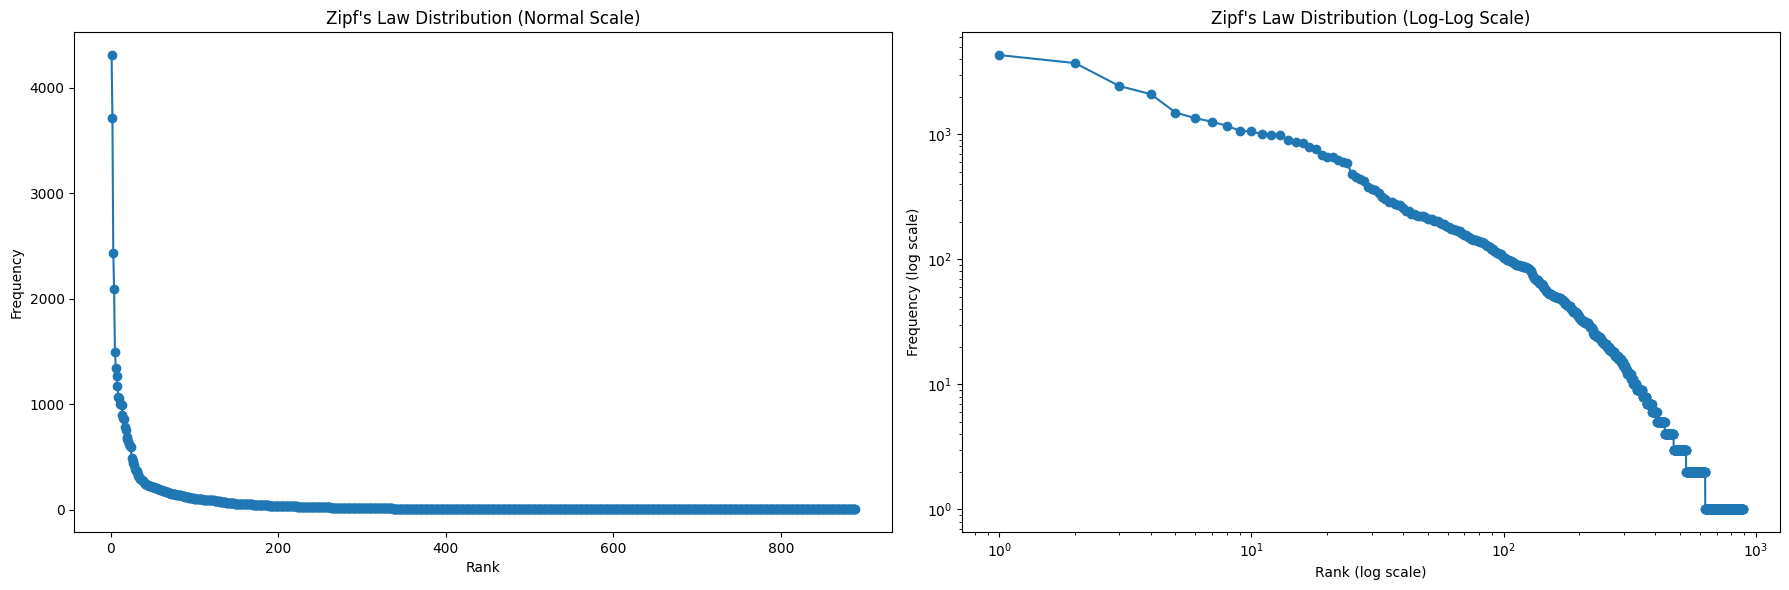

In [7]:
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('../data/train.csv', header=None)[0]

# Initialize the tokenizer and fit it on the data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data)

# Obtain the word counts
word_counts = tokenizer.word_counts
sorted_counts = sorted(word_counts.values(), reverse=True)

# Generate the Zipf's Law plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Normal plot
ax1.plot(range(1, len(sorted_counts) + 1), sorted_counts, marker='o')
ax1.set_xlabel("Rank")
ax1.set_ylabel("Frequency")
ax1.set_title("Zipf's Law Distribution (Normal Scale)")

# Log-log plot
ax2.plot(range(1, len(sorted_counts) + 1), sorted_counts, marker='o')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel("Rank (log scale)")
ax2.set_ylabel("Frequency (log scale)")
ax2.set_title("Zipf's Law Distribution (Log-Log Scale)")

plt.tight_layout()
plt.show()


In [8]:
tf.keras.utils.set_random_seed(42)

# Define the hyperparameters and training configuration
vocab_size = [100, 250, 500, 750, 889]
embedding_dim = [500, 750]
lem_stem = [(True, False), (False, True), (False, False)]
remove_stopwords = [True, False]
use_class_weights = [True, False]
use_augmented_data = [True, False]

hyperparams = {'vocab_size': 500, 'embedding_dim': 1024, 'epochs': 15, 'batch_size': 32}
train_config = {'use_class_weights': True}

total_combinations = len(vocab_size) * len(embedding_dim) * len(lem_stem) * len(remove_stopwords) * len(use_class_weights) * len(use_augmented_data)
completed_combinations = 0

for vs in vocab_size:
    for ed in embedding_dim:
        for lem, st in lem_stem:
            for rs in remove_stopwords:
                for ucw in use_class_weights:
                    for uad in use_augmented_data:
                        completed_combinations += 1
                        progress = (completed_combinations / total_combinations) * 100
                        print(f"Progress: {progress:.2f}%")
                        # Update hyperparams and train_config
                        hyperparams['vocab_size'] = vs
                        hyperparams['embedding_dim'] = ed
                        train_config['lemmatize'] = lem
                        train_config['stem'] = st
                        train_config['remove_stopwords'] = rs
                        train_config['use_class_weights'] = ucw
                        train_config['use_augmented_data'] = uad
                        model = Sequential()
                        model.add(GlobalMaxPooling1D())
                        model.add(Dense(128, activation="relu"))
                        model.add(Dense(64, activation="relu"))
                        basic = IntentRecognition(model, hyperparams, train_config=train_config, training_times=2, verbosing=0, name=f"testing_vs{vs}_ed{ed}_lem{lem}_st{st}_rs{rs}_ucw{ucw}_uad{uad}", save_results=True, results_file_name="preprocessing_larger.csv")
                        basic.train_model()
                        basic.print_training_information()
                        basic.evaluate_model()

Progress: 0.42%
Training model 2/2

Average Training Accuracy: 0.8341098427772522
Average Training F1: 0.6261011362075806
Average Training Loss: 0.2225891873240471
Average Validation Accuracy: 0.772777795791626
Average Validation F1: 0.3607398271560669
Average Validation Loss: 0.8492359817028046
Best Model Validation Accuracy: 0.7811111211776733
Best Model Validation F1: 0.35393068194389343

Evaluating model...
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - accuracy: 0.8248 - f1_score: 0.2975 - loss: 0.6796
Test accuracy: 0.8006756901741028
Test Macro F1: 0.34890511631965637
Progress: 0.83%
Training model 1/2

KeyboardInterrupt: 